## **Real/Fake Job Posting Predictions**

### **Library Import**

In [ ]:
import numpy as np
import pandas as pd
import re
import os
import pickle

# EDA

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

# NLP 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize 
import re
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,plot_roc_curve

from sklearn import datasets
from sklearn import linear_model
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#Import Data
df = pd.read_csv("/content/drive/MyDrive/IOD - Capstone/Dataset - fake_job_postings.csv")

### **EDA**

In [ ]:
df.shape

(17880, 18)

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


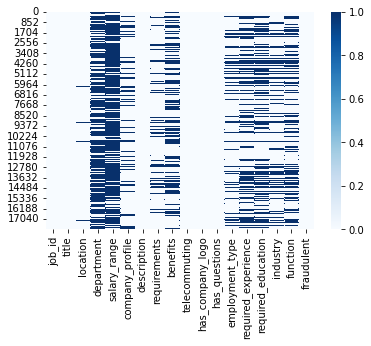

In [ ]:
# checking correlation between the data
sns.heatmap(df.isnull(),cmap="Blues")

In [ ]:
#Check for Null Values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
#Replace Null & NaN values with empty string
df.fillna('', inplace=True)

In [ ]:
#Check number of unique classes in object types in each category
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

title                  11231
location                3106
department              1338
salary_range             875
company_profile         1710
description            14802
requirements           11969
benefits                6206
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
dtype: int64

In [ ]:
#Null & NaN Values Check
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
title = df.title.value_counts()[:]
title

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [ ]:
edu = df.required_education.value_counts()[:]
edu

                                     8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

### **Visualisation**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


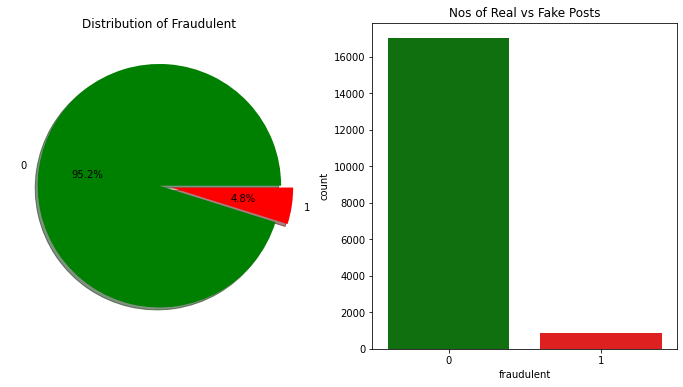

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df.fraudulent.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['green', 'red'])
ax[0].set_title('Distribution of Fraudulent')
ax[0].set_ylabel('')

sns.countplot('fraudulent',data=df,ax=ax[1],palette = ['green', 'red'])
ax[1].set_title('Nos of Real vs Fake Posts')
plt.show()

This shows dataset is highly unbalanced

In [ ]:
print(df.shape)
print(df["fraudulent"].value_counts())

(17880, 18)
0    17014
1      866
Name: fraudulent, dtype: int64


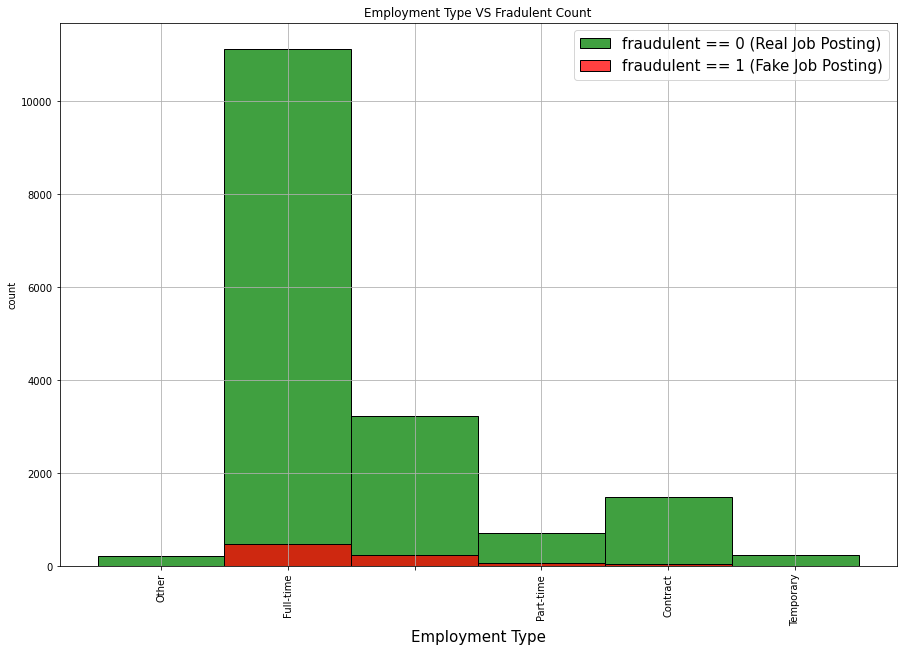

In [ ]:
#Visualisation on Employment Types

plt.figure(figsize = (15, 10))

# hist plot of loans that were repaid on time
sns.histplot(df.loc[df['fraudulent'] == 0, 'employment_type'] , label = 'fraudulent == 0 (Real Job Posting)', color= 'g')

# hist plot of loans which were not repid on time
sns.histplot(df.loc[df['fraudulent'] == 1, 'employment_type'],label = 'fraudulent == 1 (Fake Job Posting)', color ='r')

# Labeling of plot
plt.legend(loc = 'upper right', fontsize = 15)
plt.xlabel('Employment Type', fontsize = 15)
plt.ylabel('count')
plt.title('Employment Type VS Fradulent Count')
plt.xticks(rotation=90)
plt.grid();

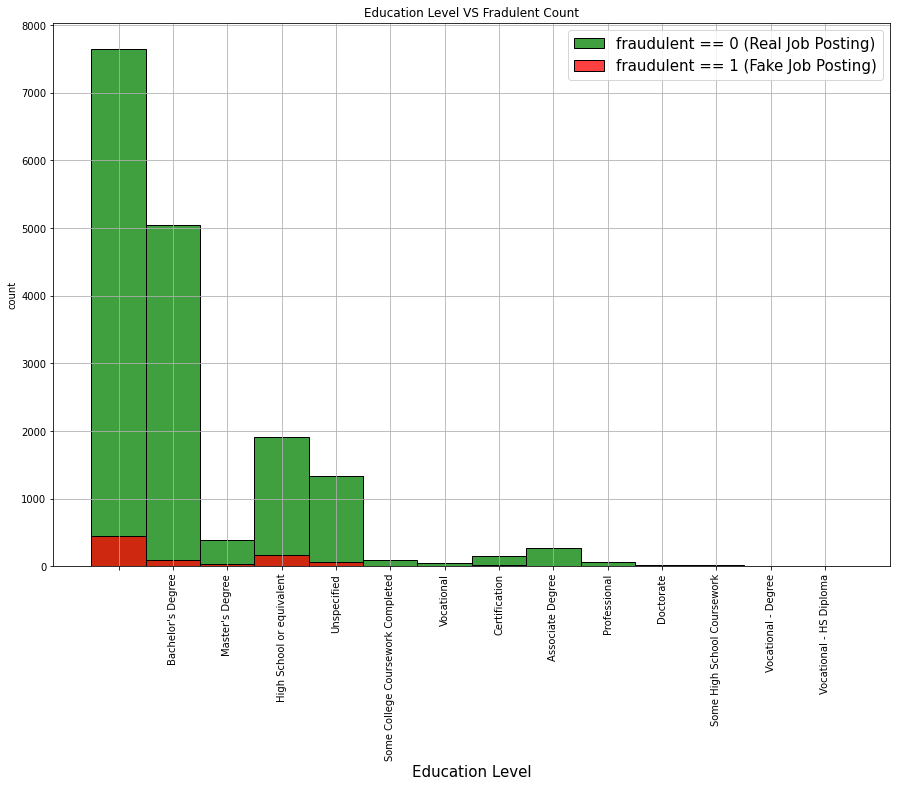

In [ ]:
#Visualisation on Required Education levels

plt.figure(figsize = (15, 10))

# hist plot of loans that were repaid on time
sns.histplot(df.loc[df['fraudulent'] == 0, 'required_education'] , label = 'fraudulent == 0 (Real Job Posting)', color= 'g')

# hist plot of loans which were not repid on time
sns.histplot(df.loc[df['fraudulent'] == 1, 'required_education'],label = 'fraudulent == 1 (Fake Job Posting)', color ='r')

# Labeling of plot
plt.legend(loc = 'upper right', fontsize = 15)
plt.xlabel('Education Level', fontsize = 15)
plt.ylabel('count')
plt.title('Education Level VS Fradulent Count')
plt.xticks(rotation=90)
plt.grid();

Based on observation, 4 required education levels have the highest Fraudulent count in the job postings

In [ ]:
locations = df.location[df.fraudulent == 1].value_counts().head(10)

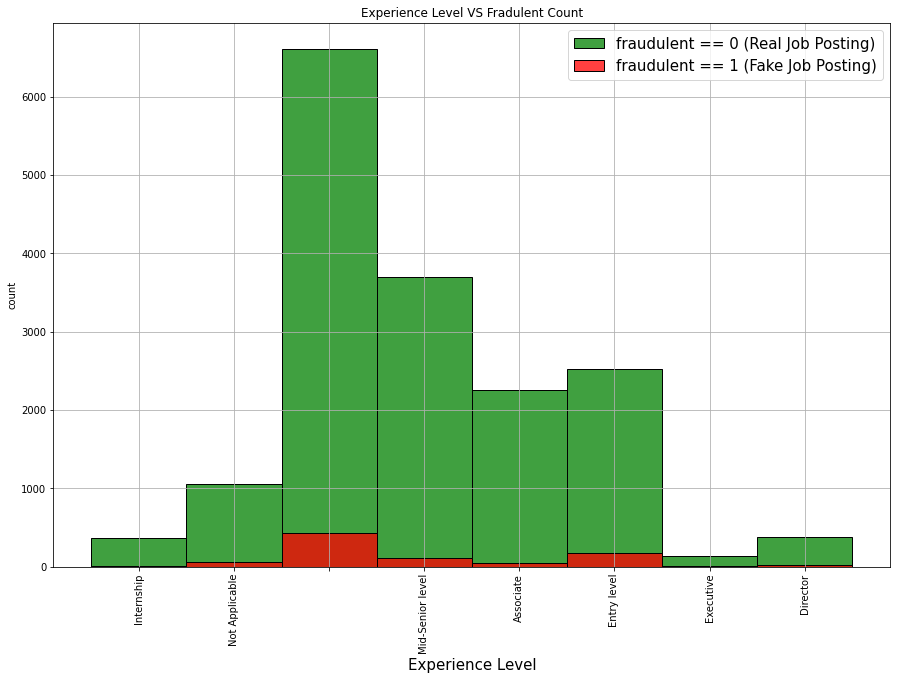

In [ ]:
#Visualisation on Required Experience

plt.figure(figsize = (15, 10))

# hist plot of loans that were repaid on time
sns.histplot(df.loc[df['fraudulent'] == 0, 'required_experience'] , label = 'fraudulent == 0 (Real Job Posting)', color= 'g')

# hist plot of loans which were not repid on time
sns.histplot(df.loc[df['fraudulent'] == 1, 'required_experience'],label = 'fraudulent == 1 (Fake Job Posting)', color ='r')

# Labeling of plot
plt.legend(loc = 'upper right', fontsize = 15)
plt.xlabel('Experience Level', fontsize = 15)
plt.ylabel('count')
plt.title('Experience Level VS Fradulent Count')
plt.xticks(rotation=90)
plt.grid();

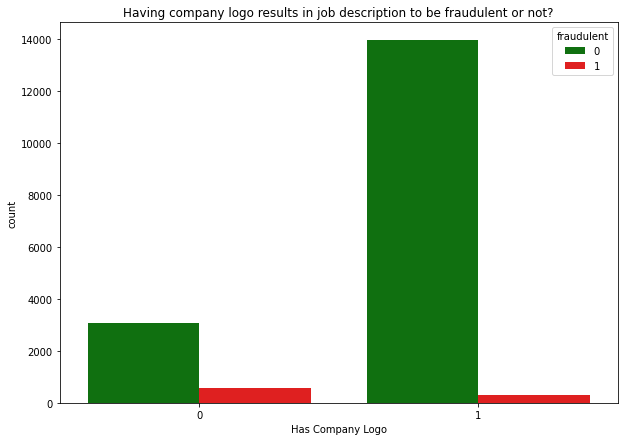

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='has_company_logo', hue='fraudulent',palette =['green','red'])
plt.title('Having company logo results in job description to be fraudulent or not?')
plt.xlabel('Has Company Logo')
plt.show()


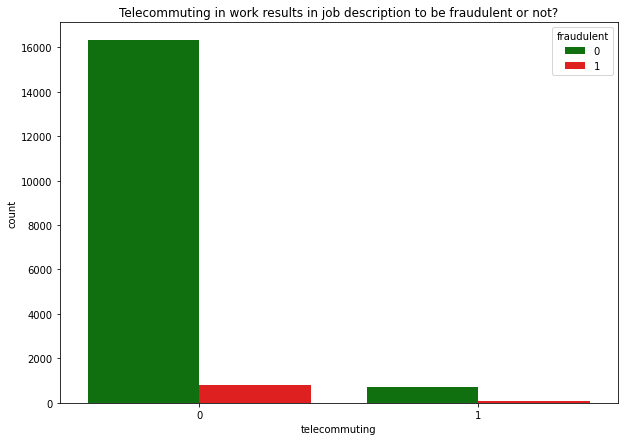

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='telecommuting', hue='fraudulent',palette =['green','red'])
plt.title('Telecommuting in work results in job description to be fraudulent or not?')
plt.xlabel('telecommuting')
plt.show()

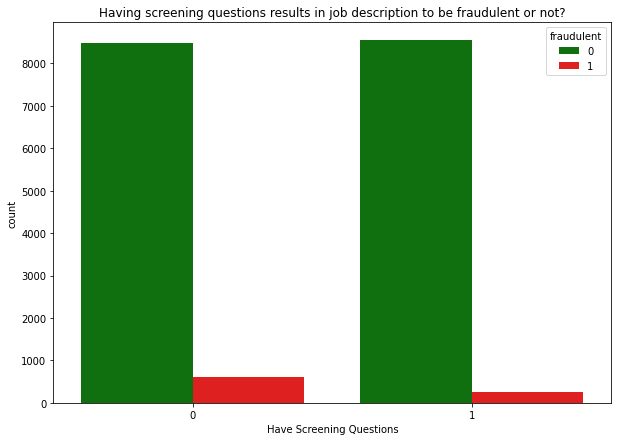

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='has_questions', hue='fraudulent',palette =['green','red'])
plt.title('Having screening questions results in job description to be fraudulent or not?')
plt.xlabel('Have Screening Questions')
plt.show()

<ipython-input-176-b3b46e716043>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)


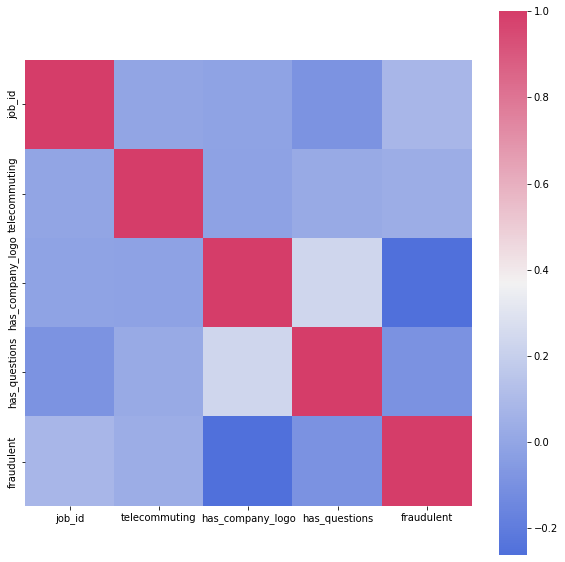

In [ ]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

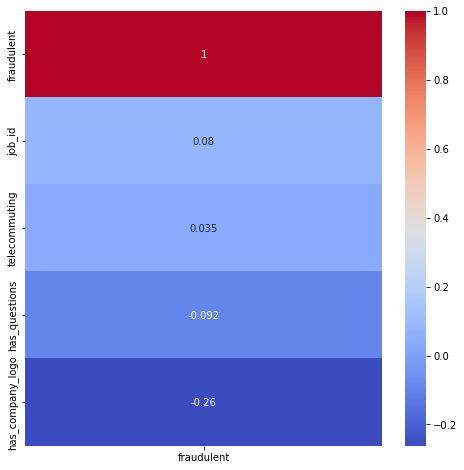

In [ ]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(df.corr()[['fraudulent']].sort_values(by=['fraudulent'],ascending=False),annot=True,cmap='coolwarm')

In [ ]:
# determine number of occupation types people who meets and does not meet target
occupation_df = pd.DataFrame(data=df.groupby(['industry','fraudulent']).count()['job_id']).reset_index().sort_values(by = 'fraudulent', ascending = False)
occupation_df

,industry,fraudulent,job_id
40,Computer Software,1,5
1,,1,275
55,E-Learning,1,2
162,Real Estate,1,24
53,Design,1,4
...,...,...,...
81,"Health, Wellness and Fitness",0,112
83,Higher Education,0,11
84,Hospital & Health Care,0,446
86,Hospitality,0,74


In [ ]:
from wordcloud import WordCloud,STOPWORDS
from collections import defaultdict
from nltk import ngrams

In [ ]:
df.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0


In [ ]:
del df['salary_range']
del df['job_id']

In [ ]:
#Combined Text Columns for NLP
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 

In [ ]:
df.text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [ ]:
df1 = df

In [ ]:
#Delete Text Colunmn after combined
del df1['title']
del df1['location']
del df1['department']
del df1['company_profile']
del df1['description']
del df1['requirements']
del df1['benefits']
del df1['employment_type']
del df1['required_experience']
del df1['required_education']
del df1['industry']
del df1['function']

In [ ]:
df1.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotSo..."


In [ ]:
df1['text'][1]

"Customer Service - Cloud Video Production NZ, , Auckland Success 90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest in

### **Pre-Processing**

In [ ]:
#for row in df1.itertuples():
  #print(row["text"])
  #break

In [ ]:
df1['text_lower'] = df1['text'].str.lower()

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
df1['text_no_stop'] = df1['text_lower'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

In [ ]:
df1['text_lemm']=df1['text_no_stop'].apply(lambda x: ' '.join(wordnet.lemmatize(word) for word in x.split()))

In [ ]:
df1[['text_no_stop','text_lemm']].head(1)


,text_no_stop,text_lemm
0,"marketing intern us, ny, new york marketing we...","marketing intern us, ny, new york marketing we..."


In [ ]:
df1.head(1)

,telecommuting,has_company_logo,has_questions,fraudulent,text,text_lower,text_no_stop,text_lemm
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We...","marketing intern us, ny, new york marketing we...","marketing intern us, ny, new york marketing we...","marketing intern us, ny, new york marketing we..."


In [ ]:
del df1['text']
del df1['text_lower']
del df1['text_no_stop']

In [ ]:
from wordcloud import WordCloud,STOPWORDS
from collections import defaultdict
from nltk import ngrams

(-0.5, 1599.5, 799.5, -0.5)

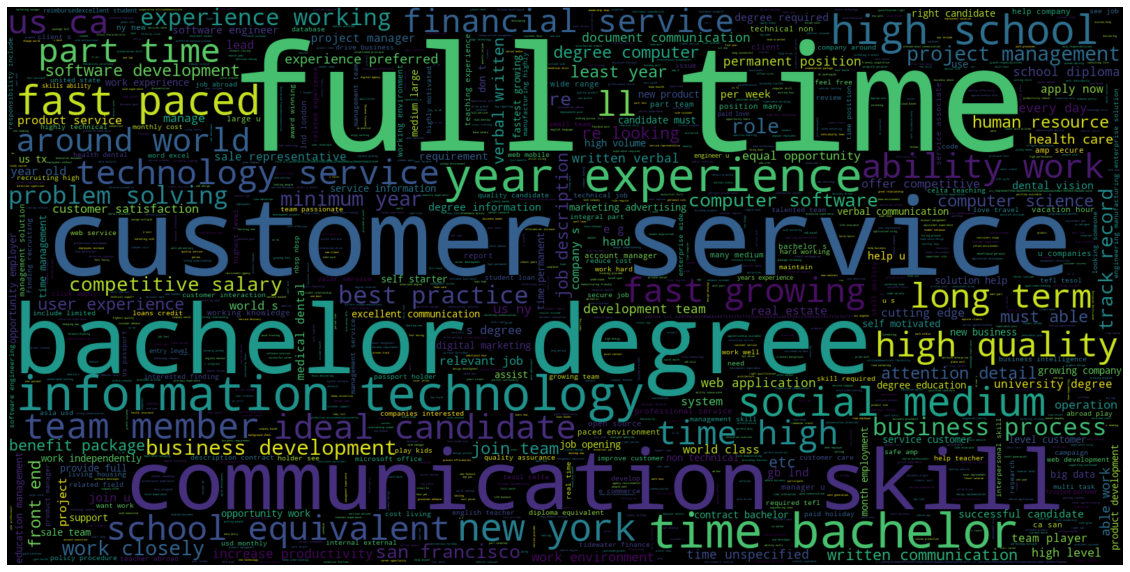

In [ ]:
#Show text that are not Fraudulent
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df1[df1.fraudulent == 0].text_lemm))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

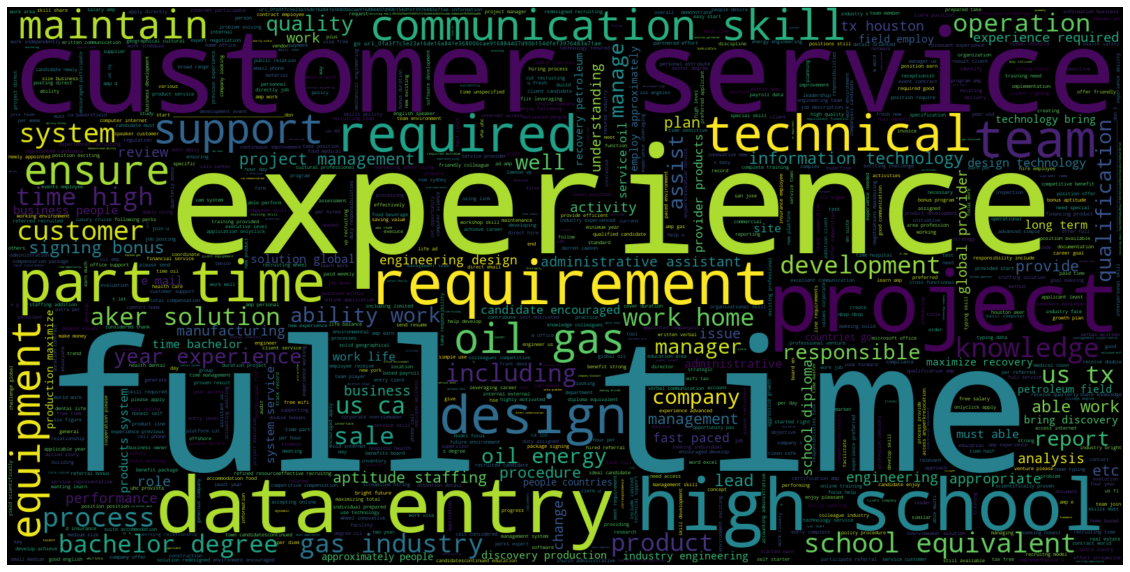

In [ ]:
#Show text that are Fraudulent
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df1[df1.fraudulent == 1].text_lemm))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')

In [ ]:
#ps = PorterStemmer()
#wordnet=WordNetLemmatizer()
#sentences = df1['text']
#df1['tokenize'] = sentences.apply(nltk.sent_tokenize)

In [ ]:
#df1['tokenize'].head()

In [ ]:
#import nltk
#nltk.download("stopwords")
#from nltk.corpus import stopwords

#print(stopwords.words("english"))

#stop_words = set(stopwords.words("english"))
#df1['text'] = df1['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))
#df1['text'][0]

In [ ]:
#df1['text'][0]

### **X train & y train Selection**

In [ ]:
X = df1.drop(['fraudulent'],axis=1)
X.head(1)


,telecommuting,has_company_logo,has_questions,text_lemm
0,0,1,0,"marketing intern us, ny, new york marketing we..."


In [ ]:
y = df1['fraudulent']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

### **Undersampling to Balance Dataset**

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(sampling_strategy=1)
#X_rus,y_rus = rus.fit_resample(X,y)

#ax = y_rus.value_counts().plot.pie(autopct='%.2f')

#_ = ax.set_title("Undersampling")

In [ ]:
#_rus.head()

### **Train Text Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(X,y ,test_size =0.3,random_state=42,stratify = y)

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train,X_test ,y_train,y_test = train_test_split(df1.text_lemm, df1.fraudulent ,test_size =0.3)

In [ ]:
X_train.shape

(12516, 4)

In [ ]:
X_test.shape

(5364, 4)

In [ ]:
y_train.shape

(12516,)

In [ ]:
y_test.shape

(5364,)

### **Count Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features = 500, stop_words= 'english')

In [ ]:
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train['text_lemm']).todense(),
                            columns=cvec.get_feature_names_out())

In [ ]:
cvec.get_feature_names_out()

array(['000', '10', '100', '30', 'ability', 'able', 'abroad', 'access',
       'account', 'accounting', 'achieve', 'activity', 'ad',
       'administrative', 'advertising', 'agency', 'agile', 'amp',
       'analysis', 'analyst', 'analytical', 'analytics', 'app',
       'application', 'applications', 'apply', 'approach', 'appropriate',
       'area', 'assigned', 'assist', 'assistant', 'associate',
       'attention', 'attitude', 'available', 'awesome', 'bachelor',
       'background', 'base', 'based', 'basic', 'believe', 'benefit',
       'benefits', 'best', 'better', 'bi', 'big', 'bonus', 'brand',
       'bring', 'build', 'building', 'business', 'ca', 'campaign',
       'candidate', 'care', 'career', 'center', 'challenge', 'change',
       'check', 'city', 'class', 'client', 'clients', 'closely', 'cloud',
       'code', 'come', 'communicate', 'communication', 'community',
       'companies', 'company', 'compensation', 'competitive', 'complete',
       'complex', 'computer', 'consultant

In [ ]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_cvec = pd.DataFrame(cvec.transform(X_test['text_lemm']).todense(),columns=cvec.get_feature_names_out())

In [ ]:
X_train_cvec.head()

,000,10,100,30,ability,able,abroad,access,account,accounting,...,wide,word,work,working,world,writing,written,year,years,york
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,4,2,2,0,0,2,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
3,0,0,1,0,1,1,0,0,5,0,...,1,0,0,1,1,0,0,4,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,6,1,0,0,0,1,0,0


In [ ]:
X_test_cvec.head()

,000,10,100,30,ability,able,abroad,access,account,accounting,...,wide,word,work,working,world,writing,written,year,years,york
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,2,1,0,1
4,0,0,0,0,1,1,0,1,0,0,...,0,0,3,2,1,0,0,1,0,0


### **Model 1 (Baseline):Naive Bayes with Count Vectorizer**

In [ ]:
# Import our model!
from sklearn.naive_bayes import MultinomialNB
# Instantiate our model!
nb = MultinomialNB()


In [ ]:
# Fit our model!
model = nb.fit(X_train_cvec,y_train)

In [ ]:
# Generate our predictions!
predictions = model.predict(X_test_cvec)

In [ ]:
# Score our model on the training set.

model.score(X_train_cvec,y_train)


0.8469159475870885

In [ ]:
# Score our model on the testing set.
model.score(X_test_cvec,y_test)


0.8555182699478001

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

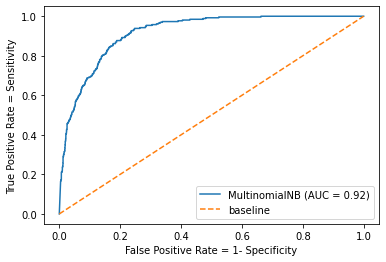

In [ ]:
plot_roc_curve(nb,X_test_cvec, y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


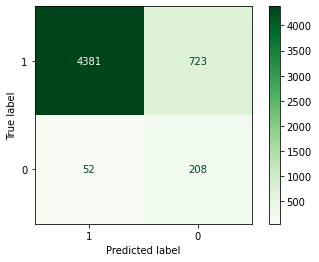

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(model,X_test_cvec, y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

In [ ]:
confusion_matrix(y_test,predictions)

array([[4381,  723],
       [  52,  208]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

In [ ]:
print("True Negative : %s "%tn)
print("False Positive : %s "%fp)
print("False Negative : %s "%fn)
print("True Positive : %s "%tp)

True Negative : 4381 
False Positive : 723 
False Negative : 52 
True Positive : 208 


### **Model 2: Logistics Regression with Count Vectorizer**

In [ ]:
lr_cvec = LogisticRegression(max_iter=3000,class_weight='balanced')

In [ ]:
lr_cvec.fit(X_train_cvec, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [ ]:
print(lr_cvec.intercept_)
print(lr_cvec.coef_)

[1.60644173]
[[ 1.04661225e+00 -1.99843258e-01  7.02844006e-01  3.94862457e-01
   1.17096817e-01 -1.19197586e-01 -1.01075957e+00  1.39313232e-01
  -6.45944205e-01  5.82242905e-01  1.27286325e+00 -2.28261085e-02
   2.38088598e-01  7.28200563e-01  2.15040051e-01 -7.77599381e-01
   2.35254688e-01  2.67244372e-01 -1.81045483e-01 -9.26604919e-01
  -1.45681741e+00 -1.42467204e-01 -2.88644807e-01 -1.18202278e-01
  -1.09487739e+00  7.39403988e-01  1.50928185e-01  5.76176693e-01
   5.81915022e-02  2.37642046e-01  4.61217611e-02 -4.51741191e-01
  -9.07779227e-01  7.08033170e-01 -2.23388865e-01  8.22553944e-02
  -9.68244015e-01 -4.70139618e-01 -6.35228154e-01 -4.21405309e-01
  -6.65512670e-01 -1.04771848e+00 -1.05642396e+00  3.37871341e-01
  -1.23041119e-02  1.04639522e-01 -3.42497556e-01  3.93305285e-01
  -1.52718880e-01  7.68181384e-01 -4.31999908e-02  9.29243132e-01
   4.65611449e-02 -4.90971781e-01 -5.86871466e-02  4.82743089e-01
   3.79090218e-01 -2.82549115e-01  1.58360497e-01 -4.15294924e-

In [ ]:
lr_cvec.predict(X_test_cvec)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Z_proba = np.round(lr_cvec.predict_proba(X_test_cvec),2)

In [ ]:
print(f'The logistic score model is {lr_cvec.score(X_train_cvec, y_train)}')

The logistic score model is 0.9430329178651327


In [ ]:
print(f' the Test logistic score model is {lr_cvec.score(X_test_cvec, y_test)} ')

 the Test logistic score model is 0.9272930648769575 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

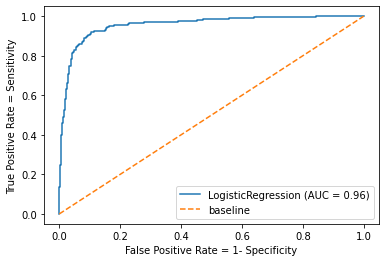

In [ ]:
plot_roc_curve(lr_cvec,X_test_cvec, y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


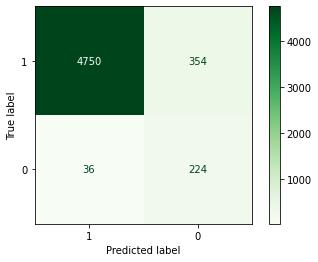

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(lr_cvec,X_test_cvec, y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

### **Model 3: SVC with Count Vectorizer**

**Hypertuning - GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
#param_grid = {'C': [10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
  
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
#grid.fit(X_train_cvec, y_train)

In [ ]:

# print best parameter after tuning
#print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

In [ ]:
#Gridsearch CV takes too long to load, shall quote the code for fast loading
#Best Param found (C=10,kernel = "rbf", gamma = 0.01)

In [ ]:
# Instantiate support vector machine.
svc = SVC (C = 10,kernel = "rbf",gamma = 0.01)

In [ ]:
 # Fit support vector machine to training data.
svc.fit (X_train_cvec,y_train)

SVC(C=10, gamma=0.01)

In [ ]:
svc.score(X_train_cvec,y_train)

0.9992010226909556

In [ ]:
svc.score(X_test_cvec,y_test)

0.9806114839671887

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

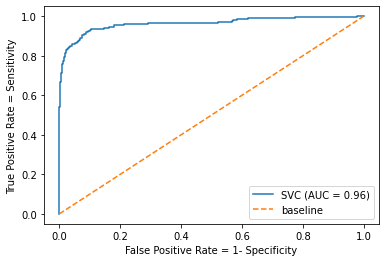

In [ ]:
plot_roc_curve(svc,X_test_cvec,y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


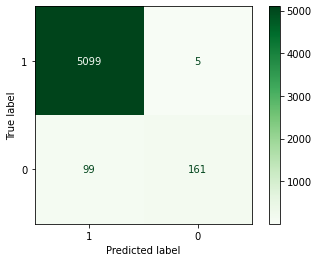

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(svc,X_test_cvec, y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

### **Model 4: KNN with CVEC**

In [ ]:
sc = StandardScaler()
Z_train_cvec = sc.fit_transform(X_train_cvec)
Z_test_cvec = sc.transform(X_test_cvec)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
cross_val_score(knn,Z_train_cvec,y_train,cv=7).mean()

0.9553371684244167

In [ ]:
knn.fit(Z_train_cvec,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(Z_train_cvec,y_train)

0.9773889421540428

In [ ]:
knn.score(Z_test_cvec,y_test)

0.9589858314690529

In [ ]:
y_pred_knn = knn.predict(Z_test_cvec)
y_pred_knn

array([0, 0, 0, ..., 0, 1, 0])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

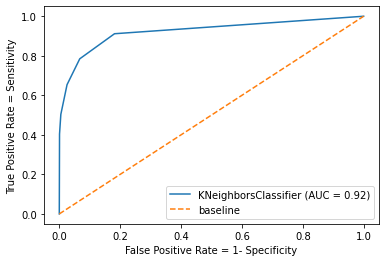

In [ ]:
plot_roc_curve(knn,Z_test_cvec,y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


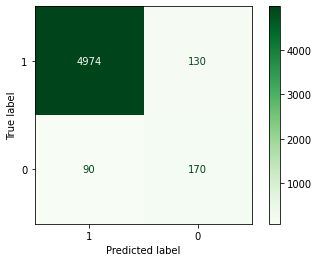

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(knn,Z_test_cvec,y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

### **X & y Selection**

In [ ]:
X = df1.drop(['fraudulent'],axis=1)
X.head(1)


,telecommuting,has_company_logo,has_questions,text_lemm
0,0,1,0,"marketing intern us, ny, new york marketing we..."


In [ ]:
y = df1['fraudulent']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

### **X train & y train Selection**

In [ ]:
X = df1.drop(['fraudulent'],axis=1)
X.head(1)


,telecommuting,has_company_logo,has_questions,text_lemm
0,0,1,0,"marketing intern us, ny, new york marketing we..."


In [ ]:
y = df1['fraudulent']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

### **Train Text Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(X,y ,test_size =0.3,random_state=42,stratify = y)

### **TFIDF Vectorizer**

In [ ]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 500, stop_words= 'english')

In [ ]:
X_train_TFIDF = pd.DataFrame(cv.fit_transform(X_train['text_lemm']).todense(),
                            columns=cv.get_feature_names_out())

In [ ]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_TFIDF = pd.DataFrame(cv.transform(X_test['text_lemm']).todense(),columns=cv.get_feature_names_out())

### **Model 5: Naive Bayes with TFIDF**

In [ ]:
# Fit our model!
model = nb.fit(X_train_TFIDF,y_train)

In [ ]:
# Generate our predictions!
predictions = model.predict(X_train_TFIDF)

In [ ]:
# Score our model on the training set.

model.score(X_train_TFIDF,y_train)


0.9544582933844679

In [ ]:
# Score our model on the testing set.
model.score(X_test_TFIDF,y_test)


0.9548844146159582

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

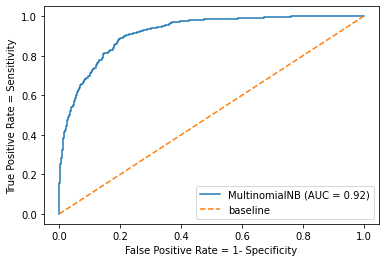

In [ ]:
plot_roc_curve(nb,X_test_TFIDF, y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


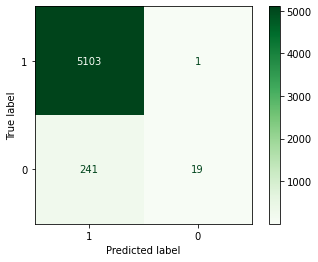

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(nb,X_test_TFIDF, y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

### **Model 6: Logistic Regression with TFIDF**

In [ ]:
lr_TFIDF = LogisticRegression(max_iter=3000,class_weight='balanced')

In [ ]:
lr_TFIDF.fit(X_train_TFIDF, y_train)

In [ ]:
print(lr_TFIDF.intercept_)
print(lr_TFIDF.coef_)

In [ ]:
lr_TFIDF.predict(X_test_TFIDF)

In [ ]:
Z_proba = np.round(lr_cvec.predict_proba(X_test_TFIDF),2)

In [ ]:
print(f'The logistic score model is {lr_TFIDF.score(X_train_TFIDF, y_train)}')

In [ ]:
print(f' the Test logistic score model is {lr_TFIDF.score(X_test_TFIDF, y_test)} ')

In [ ]:
plot_roc_curve(lr_TFIDF,X_test_TFIDF, y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(lr_TFIDF,X_test_TFIDF, y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

### **Model 6: SVC with TFIDF**

**Hypertuning - GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
# param_grid = {'C': [10], 
              # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              # 'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# grid.fit(X_train_TFIDF, y_train)

In [ ]:

# print best parameter after tuning
# print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [ ]:
# Instantiate support vector machine.
svc = SVC (

    C = 10,
    kernel = "rbf",
    gamma = 1
)

In [ ]:
 # Fit support vector machine to training data.
svc.fit (X_train_TFIDF,y_train)

SVC(C=10, gamma=1)

In [ ]:
svc.score(X_train_TFIDF,y_train)

0.9998402045381911

In [ ]:
svc.score(X_test_TFIDF,y_test)

0.9862043251304996

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

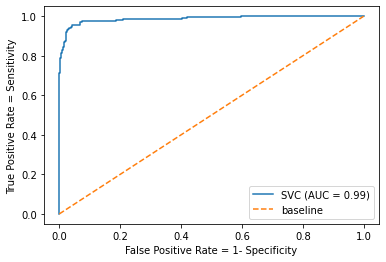

In [ ]:
plot_roc_curve(svc,X_test_TFIDF,y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


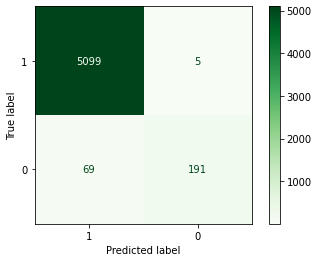

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(svc,X_test_TFIDF,y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

### **Model 6: KNN with TFIDF**

In [ ]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train_TFIDF)
Z_test = sc.transform(X_test_TFIDF)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
cross_val_score(knn,Z_train,y_train,cv=7).mean()

0.9741131351869606

In [ ]:
knn.fit(Z_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(Z_test,y_test)

0.976882923191648

In [ ]:
knn.score(Z_train,y_train)

0.9825023969319271

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

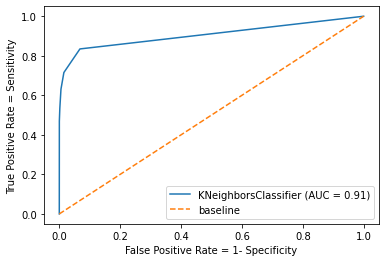

In [ ]:
plot_roc_curve(knn,Z_test,y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

In [ ]:
y_pred_knn = knn.predict(Z_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


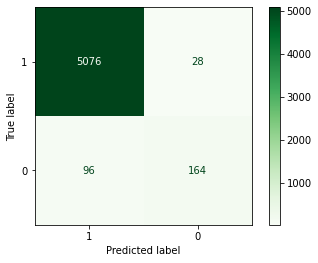

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(knn,Z_test,y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])